In [187]:
'''
This model is not implemented as part of the project. 
This was only used for comparison, and self evaluation
'''

import pandas as pd
import numpy as np
import cv2
import os

img = cv2.imread(r'data\3268\WIN_20230320_00_21_12_Pro.jpg')

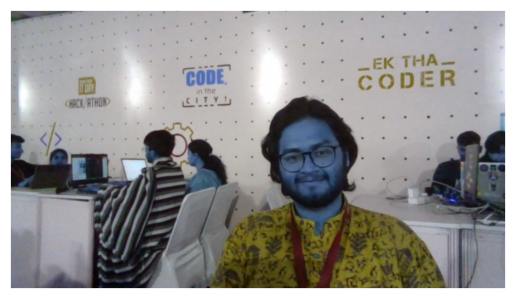

In [188]:
from matplotlib import pyplot as plt
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [189]:
X_images = []
for imgFolder in os.listdir('data/'):
    for filename in os.listdir('data/' + imgFolder)[:20]:
        filename = 'data/' + imgFolder + '/' + filename
        img = cv2.imread(filename,0) # read the image using OpenCV\
        img = cv2.resize(img, img.shape, interpolation = cv2.INTER_AREA)
        X_images.append(img)

X_images = np.asarray(X_images)
X_images.shape

(100, 1280, 720)

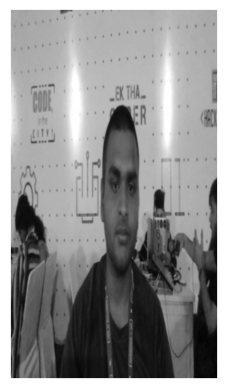

In [190]:
plt.imshow(X_images[20], cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [191]:
y_train = []
for imgfolder in os.listdir('data/'):
    for filename in os.listdir('data/' + imgfolder)[:20]:
        y_train.append(imgfolder)
y_train = np.asarray(y_train)
y_train.shape

(100,)

In [192]:
X_test = []
for imgfolder in os.listdir('data/'):
    for filename in os.listdir('data/' + imgfolder)[20:]:
        filename = 'data/' + imgfolder + '/' + filename
        img = cv2.imread(filename,0)
        img = cv2.resize(img, img.shape, interpolation = cv2.INTER_AREA)
        X_test.append(img)
X_test = np.asarray(X_test)
X_test.shape

(25, 1280, 720)

In [193]:
y_test = []
for imgfolder in os.listdir('data/'):
    for filename in os.listdir('data/' + imgfolder)[20:]:
        y_test.append(imgfolder)
y_test = np.asarray(y_test)
y_test.shape

(25,)

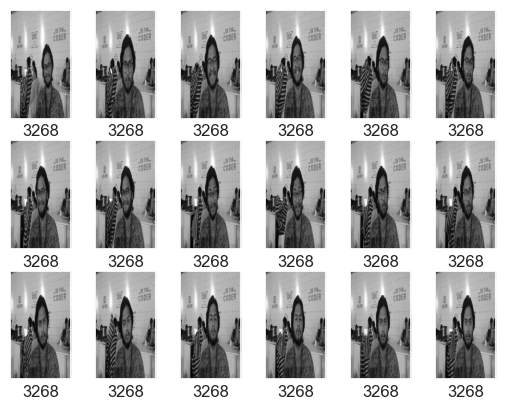

In [194]:
%matplotlib inline
import seaborn as sns; sns.set()

fig,ax = plt.subplots(3,6)
for i, axis in enumerate(ax.flat):
    axis.imshow(X_images[i], cmap= 'gray')
    axis.set(xticks = [], yticks=[], xlabel=y_train[i])

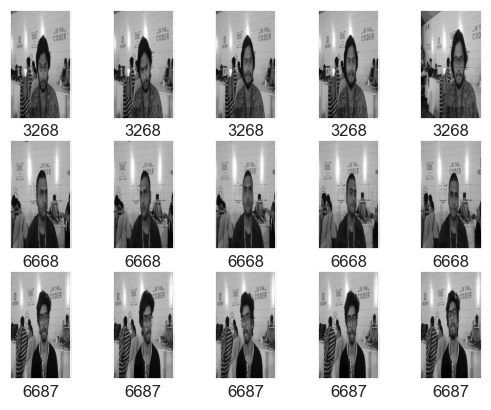

In [195]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i], cmap='gray')
    axi.set(xticks=[], yticks=[],
            xlabel=y_test[i])

In [196]:
import warnings
warnings.filterwarnings("ignore")
# code for the SVC Face recognition example.
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
#extracting only 10 features out of 47*62 = 2914 features
pca = RandomizedPCA(n_components=80, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [197]:
#flatten images.
X_data = X_images.reshape(X_images.shape[0], X_images.shape[1] * X_images.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

In [198]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

grid.fit(X_data, y_train)
print(grid.best_params_)

KeyboardInterrupt: 

In [ ]:
grid.best_score_

0.2

In [ ]:
model = grid.best_estimator_
yfit = model.predict(X_test)
X_test

array([[ 96, 101, 101, ..., 144, 147, 148],
       [ 94,  99,  99, ..., 140, 142, 144],
       [ 98, 102, 100, ..., 144, 147, 147],
       ...,
       [161, 161, 163, ..., 121, 118, 109],
       [161, 162, 163, ..., 123, 117, 111],
       [159, 161, 162, ..., 131, 120, 109]], dtype=uint8)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

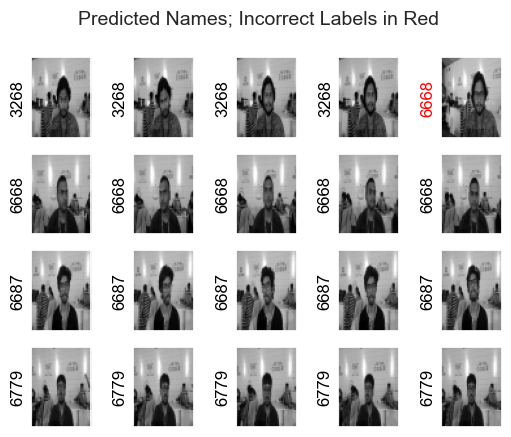

In [ ]:
fig, ax = plt.subplots(4, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(yfit[i].split()[-1],
                   color='black' if yfit[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [ ]:
image = cv2.imread('test.jpeg', 0)
test = [cv2.resize(image, image.shape, interpolation = cv2.INTER_AREA)]

test = np.asarray(test)
test = test.reshape(test.shape[0], test.shape[1] * test.shape[2])
model.predict(test)

array(['3268'], dtype='<U4')